## Import modules, mount your Google Drive, read data
Set up your environment

In [ ]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data
# on the lefthand side, navigate to your data and copy the path
df = pd.read_csv('/content/drive/MyDrive/TAMU Competition/2022_Competition_Training.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (760) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Store the original dataset in a raw data frame
df_raw = df.copy()

In [ ]:
df.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,hi_flag
0,100039218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.08,33511.0,0.0,0.0,0.00,0.0,9.1,NaN,0
1,100042427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,176797.0,0.0,0.0,0.00,0.0,6.8,0.670459,0
2,100055103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,380673.0,0.0,0.0,0.00,0.0,8.3,0.879186,0
3,100074556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,267696.0,0.0,0.0,0.00,0.0,7.3,0.746201,0
4,100079932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,19095.0,0.0,0.0,0.25,0.0,6.9,NaN,0


In [ ]:
df.shape

(48300, 881)

In [ ]:
df.columns

Index(['id', 'rx_hum_19_pmpm_cost', 'cmsd2_can_mal_male_genital_pmpm_ct',
       'cmsd2_inj_surgical_pmpm_ct', 'rev_pm_capd_pmpm_cd_ct',
       'cci_chf_pmpm_ct', 'rx_phar_cat_safeway_pmpm_ct',
       'cmsd2_ext_car_pmpm_ct', 'cmsd2_dig_liver_pmpm_ct',
       'cmsd2_mus_arthropath_pmpm_ct',
       ...
       'cmsd2_ext_nature_pmpm_ct', 'cmsd2_gus_m_genital_pmpm_ct',
       'atlas_totalpopacs', 'cmsd2_neo_neo_other_pmpm_ct',
       'cmsd2_dig_hernia_pmpm_ct', 'cmsd2_sns_blood_pmpm_ct',
       'cmsd2_ext_compl_medical_care_pmpm_ct', 'rwjf_food_env_inx',
       'atlas_snapspth16', 'hi_flag'],
      dtype='object', length=881)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Columns: 881 entries, id to hi_flag
dtypes: float64(817), int64(57), object(7)
memory usage: 324.6+ MB


## Data Cleaning

### NULL value treatment

In [ ]:
%%time
nulls_col_list=[]
nulls_count=[]
nulls_pct=[]
cnt=0
for i in df.columns:
  if(df[i].isnull().sum().sum()>0):
    nulls_col_list.append(i)
    nulls_count.append(df[i].isnull().sum().sum())
    nulls_pct.append(df[i].isnull().sum().sum()/len(df))
    #print("Column",i,df[i].isnull().sum().sum())
    cnt=cnt+1
print("Number of columns with nulls",cnt)

Number of columns with nulls 260
CPU times: user 635 ms, sys: 3.82 ms, total: 639 ms
Wall time: 1.33 s


In [ ]:
nulls_df = pd.DataFrame(list(zip(nulls_col_list, nulls_count,nulls_pct)),columns =['Column', 'Nulls_cnt','Null_cnt_pct'])

In [ ]:
#Export it to csv
nulls_df.to_csv('nulls_columns.csv')

In [ ]:
#Delete the columns which have more than 15% of NULLs in the column(Let us explore more with pct later)
del_col_list=list(nulls_df[nulls_df['Null_cnt_pct']>0.15]['Column'])
#del_col_list.head()

In [ ]:
del_col_list

['rwjf_homicides_rate',
 'rwjf_premature_death_rate',
 'rwjf_poor_men_hlth_days',
 'credit_bal_nonmtgcredit_60dpd',
 'cons_lwcm10',
 'cons_hxmioc',
 'credit_hh_autobank',
 'atlas_naturalchangerate1016',
 'credit_num_1stmtg_collections',
 'rwjf_dentists_ratio',
 'cons_hxmboh',
 'cons_mobplus',
 'credit_bal_consumerfinance_new',
 'cms_tot_partd_payment_amt',
 'cons_stlnindx',
 'cons_ccip',
 'cms_risk_adj_payment_rate_b_amt',
 'rwjf_teen_births_rate',
 'cons_homstat',
 'atlas_net_international_migration_rate',
 'rwjf_mv_deaths_rate',
 'rwjf_population',
 'cons_stlindex',
 'rwjf_violent_crime_rate',
 'cms_risk_adjustment_factor_a_amt',
 'rwjf_premature_mortality',
 'rwjf_child_mortality',
 'credit_bal_bankcard_severederog',
 'credit_hh_agencyfirstmtg_new',
 'credit_prcnt_mtgcredit',
 'rwjf_preventable_ip_rate',
 'lang_spoken_cd',
 'cms_ma_risk_score_nbr',
 'credit_bal_autobank_new',
 'cms_partd_ra_factor_amt',
 'credit_num_autobank_new',
 'rwjf_hiv_rate',
 'rwjf_poor_phy_hlth_days',
 'rwjf

In [ ]:
len(del_col_list)

47

In [ ]:
#Remove the columns from original data frame
df.drop(del_col_list, axis=1, inplace=True)

In [ ]:
df.shape

(48300, 834)

In [ ]:
print(len(del_col_list),"columns have been dropped from the dataframe which includes 3 categorical variables")

47 columns have been dropped from the dataframe which includes 3 categorical variables


Correlation

In [ ]:
%%time
df.corr().to_csv('correlation.csv')

CPU times: user 1min 41s, sys: 92.4 ms, total: 1min 41s
Wall time: 1min 42s


Demographic Variables

In [ ]:
demo_var=['cons_mobplus', 'cms_ra_factor_type_cd', 'cons_homstat', 'cms_orig_reas_entitle_cd', 'sex_cd', 'lang_spoken_cd', 'rucc_category', 'cms_race_cd','hi_flag']
#demo_var

In [ ]:
ind=[]
ind.append(0)  #creating id column
col=list(df_raw.columns)
for i in demo_var:
  ind.append(col.index(i))
  print("For column",i,"\n",df_raw[i].value_counts())
  print("NULL value count -",df_raw[i].isna().sum().sum())
ind

For column cons_mobplus 
 M    21468
S    11653
U     2940
P     1089
Name: cons_mobplus, dtype: int64
NULL value count - 11150
For column cms_ra_factor_type_cd 
 CN    37933
CP     3272
E      3098
CF     1303
D       169
C2       23
*        21
SE       20
Name: cms_ra_factor_type_cd, dtype: int64
NULL value count - 2461
For column cons_homstat 
 Y    26743
P     4269
U     3524
R     2414
T      191
Name: cons_homstat, dtype: int64
NULL value count - 11159
For column cms_orig_reas_entitle_cd 
 0.0    33359
1.0    13030
3.0       29
2.0       15
Name: cms_orig_reas_entitle_cd, dtype: int64
NULL value count - 1867
For column sex_cd 
 F    29100
M    19200
Name: sex_cd, dtype: int64
NULL value count - 0
For column lang_spoken_cd 
 ENG    28285
SPA     1069
*         10
Name: lang_spoken_cd, dtype: int64
NULL value count - 18936
For column rucc_category 
 1-Metro       21025
2-Metro       12926
3-Metro        5318
6-Nonmetro     3240
4-Nonmetro     2713
7-Nonmetro     1449
5-Nonmetro   

[0, 247, 346, 379, 400, 576, 582, 672, 760, 880]

In [ ]:
df_demo_var=df_raw.iloc[:,ind]
df_demo_var.head()

,id,cons_mobplus,cms_ra_factor_type_cd,cons_homstat,cms_orig_reas_entitle_cd,sex_cd,lang_spoken_cd,rucc_category,cms_race_cd,hi_flag
0,100039218.0,M,CN,R,0.0,M,ENG,3-Metro,1,0
1,100042427.0,M,CN,Y,0.0,F,ENG,1-Metro,6,0
2,100055103.0,S,CN,U,0.0,F,NaN,2-Metro,1,0
3,100074556.0,NaN,CF,NaN,0.0,F,NaN,2-Metro,2,0
4,100079932.0,NaN,CP,NaN,1.0,M,NaN,5-Nonmetro,1,0


In [ ]:
fig=plt.figure(figsize=[16,12])

hyp=df_demo_var[df_demo_var['hi_flag']==1].groupby(['sex_cd'],as_index=False).count()
x=hyp['sex_cd']
y=hyp['hi_flag']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(5,5))
plt.bar(x_pos, y, color='green')
plt.xlabel("Sex of Individual")
plt.ylabel("Hi Flag")
plt.title("Sex vs HI Flag")

plt.xticks(x_pos, x)
plt.show()

In [ ]:
df_demo_var.head()

,id,cons_mobplus,cms_ra_factor_type_cd,cons_homstat,cms_orig_reas_entitle_cd,sex_cd,lang_spoken_cd,rucc_category,cms_race_cd
0,100039218,M,CN,R,0.0,M,ENG,3-Metro,1
1,100042427,M,CN,Y,0.0,F,ENG,1-Metro,6
2,100055103,S,CN,U,0.0,F,NaN,2-Metro,1
3,100074556,NaN,CF,NaN,0.0,F,NaN,2-Metro,2
4,100079932,NaN,CP,NaN,1.0,M,NaN,5-Nonmetro,1


In [ ]:
df_demo_var['rucc_category'].unique()

array(['3-Metro', '1-Metro', '2-Metro', '5-Nonmetro', '4-Nonmetro',
       '6-Nonmetro', '7-Nonmetro', '8-Nonmetro', '9-Nonmetro'],
      dtype=object)

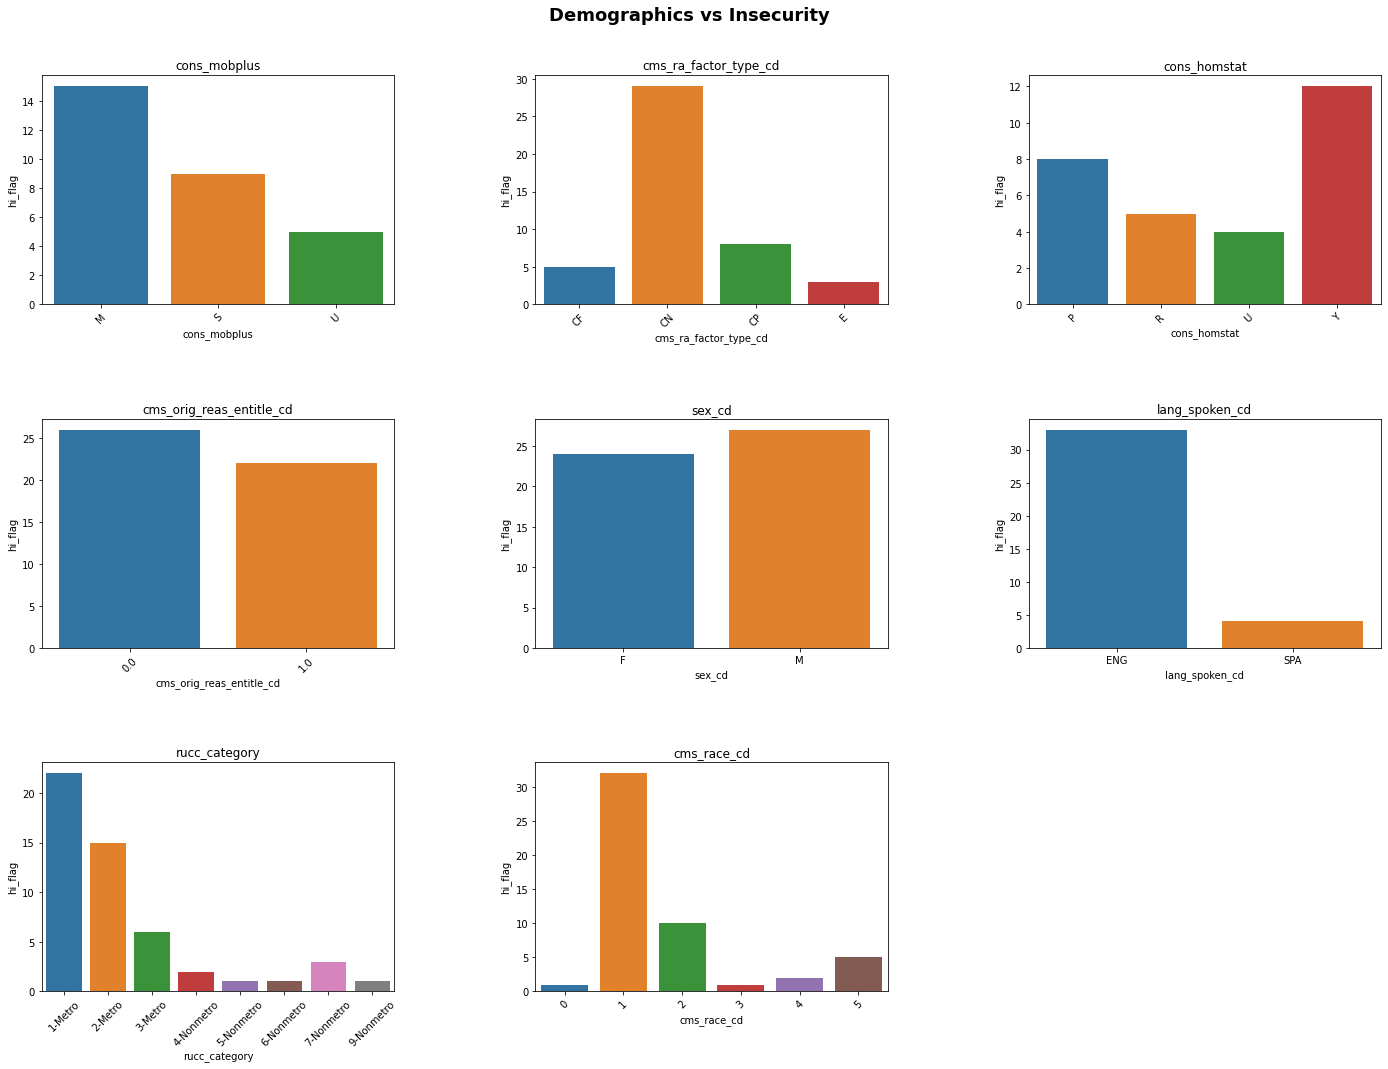

In [ ]:
fig=plt.figure(figsize=[24,16])
fig.suptitle('Demographics vs Insecurity',fontsize=18,fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5,wspace=0.4)
# demo_var.remove('hi_flag')
df_demo_var.columns
for i in range(len(demo_var)-1):
  hi=df_demo_var[df_demo_var['hi_flag']==1]
  hyp=hi.groupby([demo_var[i]],as_index=False).count()
  x=hyp[demo_var[i]]
  y=hyp['hi_flag']
  ax1=fig.add_subplot(3,3,i+1)
  ax1=sns.barplot(data=hyp, x=demo_var[i], y="hi_flag")
  ax1.set_title(f'{demo_var[i]}')
  ax1.set_xlabel(f'{demo_var[i]}')
  #locs, labels = plt.xticks()
  #plt.setp(labels, rotation=45)
  if(len(df_demo_var[demo_var[i]].unique())>3):
    plt.setp(ax1.get_xticklabels(), rotation=45)
  #ax1.set_xticklabels(rotation=30) 